In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
import numpy as np
# create dummy data for training
x_values = [i for i in range(11)]
x_train = np.array(x_values, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_values = [2*i + 1 for i in x_values]
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [20]:
import torch
from torch.autograd import Variable
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out


In [21]:
inputDim = 1        # takes variable 'x' 
outputDim = 1       # takes variable 'y'
learningRate = 0.01 
epochs = 100

model = linearRegression(inputDim, outputDim)

In [22]:
criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [24]:
for epoch in range(epochs + 1):
    # Converting inputs and labels to Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    print(loss)
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 0, loss 0.00023875031911302358
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 1, loss 0.00023608250194229186
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 2, loss 0.00023344260989688337
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 3, loss 0.0002308388357050717
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 4, loss 0.00022825713676866144
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 5, loss 0.0002257090964121744
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 6, loss 0.0002231909311376512
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 7, loss 0.00022069583064876497
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 8, loss 0.0002182275493396446
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 9, loss 0.0002157926937798038
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 10, loss 0.00021338410442695022
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 11, loss 0.0002109990455210209
tensor(0.0002, grad_fn=<MseLossBackward>)
epoch 12, loss

[[ 0.9836063]
 [ 2.9859672]
 [ 4.988328 ]
 [ 6.990689 ]
 [ 8.99305  ]
 [10.995411 ]
 [12.997771 ]
 [15.000132 ]
 [17.002493 ]
 [19.004854 ]
 [21.007215 ]]


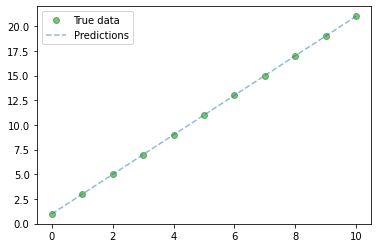

In [25]:
with torch.no_grad(): # we don't need gradients in the testing phase
    predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    print(predicted)

plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()